<a href="https://colab.research.google.com/github/yun-aha/GSTEC/blob/main/210728%2C30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 딥러닝

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
red = pd.read_csv('/content/winequality-red.csv', sep=';')  # sep=';' 세미콜론으로 분리해준다.
white = pd.read_csv('/content/winequality-white.csv', sep=';')
print(red.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]


In [ ]:
display(red)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
red['type'] = 0
white['type'] = 1

In [ ]:
red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0


In [ ]:
white.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,1


pd.concat : 데이터의 속성 형태가 동일한 데이터끼리 합치기, aixs=0은 위아래, 1은 왼오

In [ ]:
wine = pd.concat([red,white]) #default : axis=0 
display(wine.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


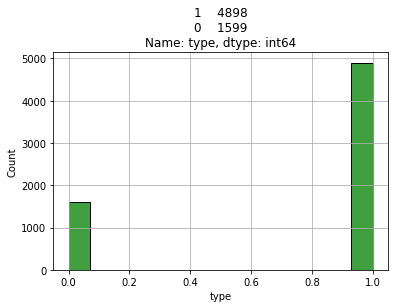

In [ ]:
sns.histplot(wine['type'], color = 'green')   # seaborn 히스토그램
plt.title('{}'.format(wine['type'].value_counts()))

plt.grid()
plt.show()

In [ ]:
wine[:30]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


.sample(frac=1)  
pandas에서 객체 내 랜덤한 샘플을 추출할 수 있도록 하는 메서드  
- n은 추출할 샘플의 개수(frac과 중복x)
- frac은 전체 개수의 비율 만큼 샘플을 반환하려 할 경우 사용(n과 중복x)

In [ ]:
wine_shuffle = wine.sample(frac=1)  # frac은 반환해야하는 전체 인스턴스의 비율 결정
print(wine_shuffle.head())

      fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
26              7.6             0.410         0.24  ...      9.5        5     0
698             9.4             0.615         0.28  ...      9.7        5     0
2546            6.7             0.500         0.38  ...      9.6        5     1
1627            8.9             0.320         0.49  ...      9.4        5     1
2918            5.7             0.280         0.28  ...     11.2        6     1

[5 rows x 13 columns]


In [ ]:
wine_np = wine_shuffle.to_numpy() # pandas를 numpy로 변환
wine_np.shape

(6497, 13)

In [ ]:
print("total dataset index : ",len(wine_np))
train_idx = int(len(wine_np) * 0.8)
print("Train dataset index : ", train_idx)

total dataset index :  6497
Train dataset index :  5197


In [ ]:
# shape이 다름, 비교
# train_X, train_Y = wine_np[ :train_idx, :-1], wine_np[ :train_idx, -1: ]
# test_X, test_Y = wine_np[ train_idx: , :-1], wine_np[ train_idx:, -1: ]

In [ ]:
train_X, train_Y = wine_np[ :train_idx, :-1], wine_np[ :train_idx, -1]
test_X, test_Y = wine_np[ train_idx: , :-1], wine_np[ train_idx:, -1]

print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(5197, 12)
(5197,)
(1300, 12)
(1300,)


In [ ]:
train_X[0]

array([ 7.6   ,  0.41  ,  0.24  ,  1.8   ,  0.08  ,  4.    , 11.    ,
        0.9962,  3.28  ,  0.59  ,  9.5   ,  5.    ])

In [ ]:
print("\nBefore - to_categorical : \n")

print(train_Y[0])
print(train_Y[1])
print(train_Y[2])

train_Y_to_categorical = tf.keras.utils.to_categorical(train_Y, num_classes=2)  #to_categorical 1차원배열을 2(num_classes)차원으로 변경
test_Y_to_categorical  = tf.keras.utils.to_categorical(test_Y, num_classes=2)

print("\nAfter - to_categorical : \n")
print(train_Y_to_categorical[0])
print(train_Y_to_categorical[1])
print(train_Y_to_categorical[2])


Before - to_categorical : 

0.0
0.0
1.0

After - to_categorical : 

[1. 0.]
[1. 0.]
[0. 1.]


In [ ]:
print(train_Y_to_categorical.shape)
print(test_Y_to_categorical.shape)

(5197, 2)
(1300, 2)


In [ ]:
model_swish_sigmoid = tf.keras.Sequential([
                                           tf.keras.layers.Dense(units=48, activation='swish', input_shape= (12,)),
                                           tf.keras.layers.Dense(units=24, activation='swish'),
                                           tf.keras.layers.Dense(units=12, activation='swish'),
                                           tf.keras.layers.Dense(units= 2, activation='sigmoid')
])

In [ ]:
model_swish_sigmoid.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),
                            loss = 'binary_crossentropy',
                            metrics = ['accuracy'])

In [ ]:
model_swish_sigmoid.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 48)                624       
_________________________________________________________________
dense_9 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_10 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_swish_sigmoid.fit(train_X, train_Y_to_categorical, epochs = 25, batch_size = 24,
                                  validation_split = 0.2, 
                                  callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3,
                                                                                monitor='val_loss')])

Epoch 1/25
174/174 [==============================] - 1s 3ms/step - loss: 0.4617 - accuracy: 0.8896 - val_loss: 0.2518 - val_accuracy: 0.9288
Epoch 2/25
174/174 [==============================] - 0s 2ms/step - loss: 0.1895 - accuracy: 0.9370 - val_loss: 0.1638 - val_accuracy: 0.9462
Epoch 3/25
174/174 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9464 - val_loss: 0.1848 - val_accuracy: 0.9365
Epoch 4/25
174/174 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9562 - val_loss: 0.3549 - val_accuracy: 0.9192
Epoch 5/25
174/174 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.9567 - val_loss: 0.4115 - val_accuracy: 0.8221


In [ ]:
val_accuracy = history.history['val_accuracy']
accuracy = history.history['accuracy']

In [ ]:
val_loss = history.history['val_loss']
loss= history.history['loss']

In [ ]:
print(val_accuracy)
print(accuracy)

[0.9288461804389954, 0.9461538195610046, 0.9365384578704834, 0.9192307591438293, 0.8221153616905212]
[0.8895838260650635, 0.9369737505912781, 0.9463555216789246, 0.956218421459198, 0.956699550151825]


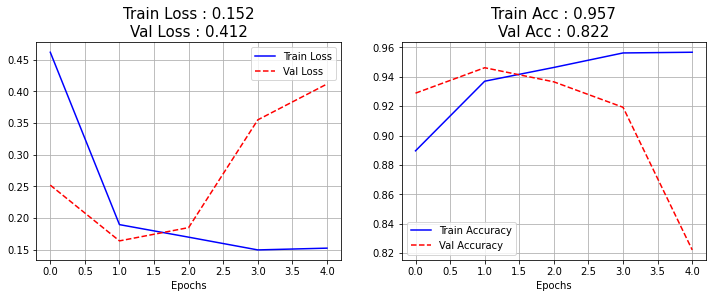

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'Train Loss')
plt.plot(history.history['val_loss'], 'r--', label = 'Val Loss')
plt.xlabel('Epochs')
plt.title("Train Loss : {:.3f}\nVal Loss : {:.3f}".\
          format(loss[-1], val_loss[-1]),fontsize=15)

plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b-', label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r--', label = 'Val Accuracy')
plt.xlabel('Epochs')
plt.title("Train Acc : {:.3f}\nVal Acc : {:.3f}".\
          format(accuracy[-1], val_accuracy[-1]),fontsize=15)
plt.grid()
plt.legend()

plt.show()

In [ ]:
model_swish_sigmoid.evaluate(test_X, test_Y_to_categorical)

41/41 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8277


[0.4167155623435974, 0.8276923298835754]

In [ ]:
pred_Y = model_swish_sigmoid.predict(test_X)
print(np.round(pred_Y[:20], 2))

[[0.57 0.41]
 [0.1  0.9 ]
 [0.01 0.99]
 [0.16 0.84]
 [0.71 0.28]
 [0.06 0.93]
 [0.13 0.86]
 [0.47 0.51]
 [0.54 0.45]
 [0.96 0.04]
 [0.1  0.89]
 [0.1  0.89]
 [0.12 0.88]
 [0.95 0.05]
 [0.29 0.7 ]
 [0.96 0.04]
 [0.96 0.04]
 [0.26 0.73]
 [0.96 0.04]
 [0.2  0.79]]


In [ ]:
pred_Y = np.round(pred_Y)
print(pred_Y[:20])

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [ ]:
model_swish_sigmoid.save('model_swish_sigmoid')

INFO:tensorflow:Assets written to: model_swish_sigmoid/assets


mse만으로 이진분류를 할 수 없겠다.(0과 1로만 구분돼 있으면 mse가 편차제곱을 이용하기 때문에  
1-0의 제곱은 1이라 1과 0이 섞여있는데도 1이란 값이 나와서 쓸수 없다.)  
--> crossentrophy 등장..  
entrophy에서 약간만 수정에서 cross entrophy 등장

# 2. 머신러닝

In [ ]:
# forge데이터는 0과 삼각형으로 구분되는 함수
!pip install mglearn

#### LogisticRegression 실습 06

붓꽃 데이터 셋을 이용한 다중 분류

In [ ]:
# 데이터 로드
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris_dataset = load_iris()

# 데이터 분리
from sklearn.model_selection import train_test_split
X = iris_dataset.data[:, 2:]
y = iris_dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(112, 2)

In [ ]:
# LogisticRegression 수행
model = LogisticRegression(C=1, max_iter=10000).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9732142857142857, 0.9736842105263158)

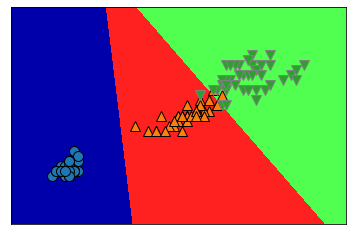

In [ ]:
# 결정경계 시각화 
mglearn.plots.plot_2d_classification(model, X_train)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

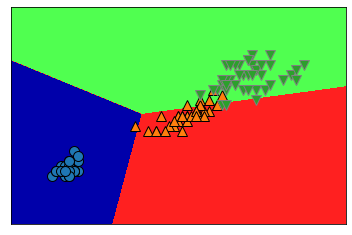

In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=1, max_iter=10000).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

# 결정경계 시각화 
mglearn.plots.plot_2d_classification(model, X_train)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

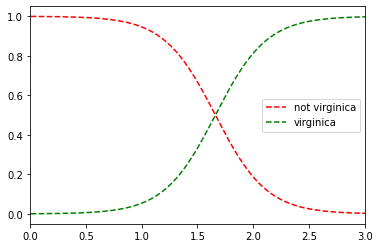

In [ ]:
# 결정경계
# 꽃잎의 너비가 0~3cm 인 꽃에 대해 모델의 추정 확률을 계산
X = iris_dataset.data[:, 3:] # 꽃잎의 너비
y = (iris_dataset.target == 2).astype(np.int) # 'virginica'

model = LogisticRegression().fit(X, y)

xx = np.linspace(-10, 10, 500).reshape(-1,1)
y_proba = model.predict_proba(xx)
plt.plot(xx, y_proba[:,0], 'r--', label='not virginica')
plt.plot(xx, y_proba[:,1], 'g--', label='virginica')
plt.xlim(0,3)
plt.legend()

#### Logistic Regression 특징

- C 값에 의해 규제 (L1, L2 모두 사용)
- 학습속도가 빠르고 예측도 빠름
- 매우 큰 데이터셋과 희소한 데이터 셋에도 잘 동작함 (solver='sag')

#### LogisticRegression 실습 07

유방암 데이터를 이용한 분석 - 2

모델비교 (kNN, 결정트리, 랜덤포레스트)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   # K-fold cross validation
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

In [ ]:
# data = pd.read_csv('data/breast_cancer.csv')
# print(data.shape)

cancer = load_breast_cancer()

In [ ]:
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train.shape

(426, 30)

In [ ]:
# 모든 속성을 다 사용하여 로지스틱 회귀 분석을 수행
model = LogisticRegression(C=10, max_iter=10000).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9694835680751174, 0.958041958041958)

In [ ]:
# 모든 속성을 다 사용한 경우의 kNN의 성능
from sklearn.neighbors import KNeighborsClassifier  
for n in range(1, 21, 2):
  model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
  print(f'k={n}', model.score(X_train, y_train), model.score(X_test, y_test) )

k=1 1.0 0.916083916083916
k=3 0.9577464788732394 0.9230769230769231
k=5 0.9413145539906104 0.9370629370629371
k=7 0.9389671361502347 0.9440559440559441
k=9 0.9366197183098591 0.958041958041958
k=11 0.9366197183098591 0.958041958041958
k=13 0.9342723004694836 0.958041958041958
k=15 0.9366197183098591 0.958041958041958
k=17 0.9295774647887324 0.958041958041958
k=19 0.9295774647887324 0.958041958041958


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.916083916083916)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.972027972027972)

선형모델은 계산을 하다보니 값에 영향을 받지만
트리계열모델은 스스로 if문을 만들어서 학습을 몹시 잘한다.  
대표적인 분류모델로 많이 쓰임.  
n_estimator은 휴전기.? 디시젼 트리  


#### 소프트맥스

- 세 개 이상 입력 값을 다루기 위함(다중분류)
- 다항 로지스틱스

> \\( { y }_{ k }=\frac { exp({ a }_{ k }) }{ \sum _{ i=1 }^{ n }{ exp({ a }_{ i }) }  }  \\)

In [ ]:
score = [-1,-0.5, 1.0, 1.5]

prob = []
sum = 0 
for s in score:
  prob.append(np.exp(s))
  sum += np.exp(s)

y = prob/sum
print(y)
print(np.sum(y))

[0.04500395 0.07419897 0.33253672 0.54826036]
1.0


In [ ]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a) # 밑이 자연상수 e인 지수함수로 변환해준다.e^a
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)
print(np.sum(y))

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]
1.0


In [ ]:
def softmax(a):
  exp_a = np.exp(a) # 지수함수
  sum_exp_a = np.sum(exp_a) # 지수의 합
  y = exp_a / sum_exp_a
  return y

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


# 3. 빅데이터 분석

In [ ]:
# 필요한 라이브러리를 가져온다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
# Pandas 데이터 프레임(시리즈)에서 float을 소수점 4자리까지 출력해준다.
pd.set_option('precision',4)

In [ ]:
# 성가신 경고를 꺼준다.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv('/content/PatientInfo.csv')

In [ ]:
print(df1.shape)    # (4004, 18)
df1.head()  

(4004, 18)


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          4004 non-null   int64  
 1   global_num          2806 non-null   float64
 2   sex                 3674 non-null   object 
 3   birth_year          3267 non-null   object 
 4   age                 3525 non-null   object 
 5   country             4004 non-null   object 
 6   province            4004 non-null   object 
 7   city                3926 non-null   object 
 8   disease             18 non-null     object 
 9   infection_case      3211 non-null   object 
 10  infection_order     31 non-null     float64
 11  infected_by         899 non-null    object 
 12  contact_number      680 non-null    object 
 13  symptom_onset_date  535 non-null    object 
 14  confirmed_date      4001 non-null   object 
 15  released_date       1508 non-null   object 
 16  deceas

### 기초적인 탐색

In [ ]:
# 결측치
df1.isnull().sum().sum()

27910

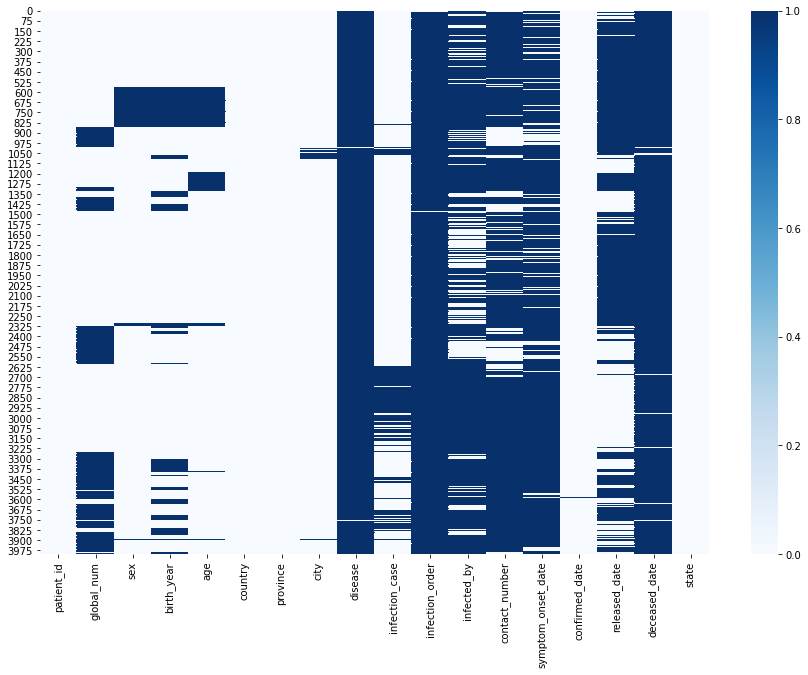

In [ ]:
# 결측치의 시각화
plt.figure(figsize=(15,10))
sns.heatmap( df1.isnull()*1, cmap='Blues', cbar=True )  # cbar= colorbar, 
plt.show()

In [ ]:
df1.isnull()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,False,True,False,True,False,False,False,False,True,False,True,True,False,True,False,False,True,False
4000,False,True,False,True,False,False,False,False,True,False,True,False,False,True,False,True,True,False
4001,False,True,False,True,False,False,False,False,True,False,True,True,False,True,False,False,True,False
4002,False,True,False,True,False,False,False,False,True,False,True,True,False,True,False,False,True,False


##### 변수를 하나씩하나씩 가져가서 분석
##### 변수를 두개씩, 세개씩 조금씩 복잡하게 나아가면서 분석


In [ ]:
# patient_id
df1.patient_id.nunique()      # 4004(데이터의 행의 수와 같음), 중복된 환자id는 없다.

4004

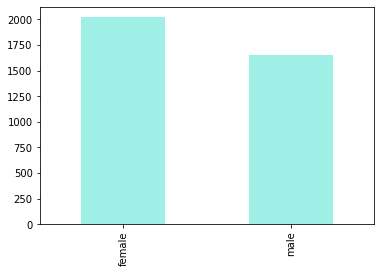

In [ ]:
# sex, 성별 환자수 집계 후 시각화(막대그래프)
sex_counts = df1.sex.value_counts()
sex_counts = sex_counts.sort_values(ascending=False)
sex_counts.plot.bar(color='turquoise', alpha=0.5)   #alpha는 투명도 조절
plt.show()

In [ ]:
# age, 연령대
df1.age.unique()

array(['50s', '30s', '20s', '60s', '80s', '70s', '40s', '10s', '90s',
       '0s', nan, '30', '100s'], dtype=object)

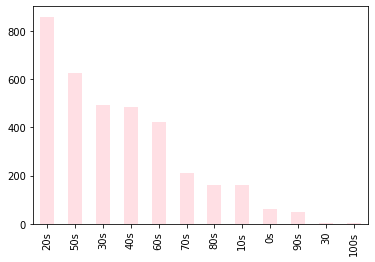

In [ ]:
# 연령대 별로 환자수를 집계하고 시각화 한다.
df1.age.str.replace('s','', regex=True)   # regex는 뭐지  # 정규표현식.?
age_counts = df1.age.value_counts()
age_counts = age_counts.sort_values(ascending=False)
age_counts.plot.bar(color='pink', alpha=0.5)
plt.show()

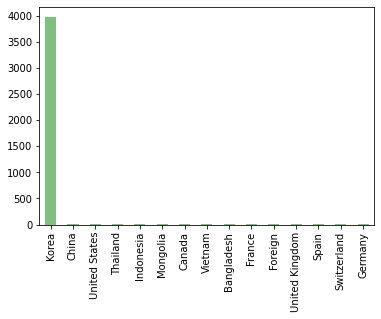

In [ ]:
# country, 국적별 환자수 집계 및 시각화
country_counts = df1.country.value_counts()
country_counts = country_counts.sort_values(ascending=False)
country_counts.plot.bar(color='green', alpha=0.5)
plt.show()

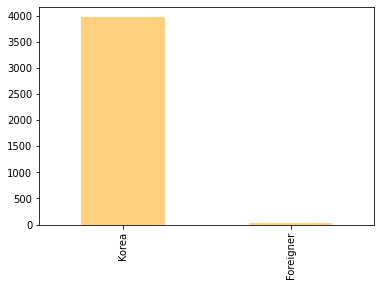

In [ ]:
# 내/외국인 별 집계 및 시각화
country_counts = (df1.country == 'Korea').value_counts()
country_counts = country_counts.sort_values(ascending=False)
country_counts.index = ['Korea', 'Foreigner']
country_counts.plot.bar(color='orange', alpha=0.5)
plt.show()

In [ ]:
# disease, 기저질환
# 정상값의 수가 적어서 분석 불가!
df1.disease.count()   #18

18

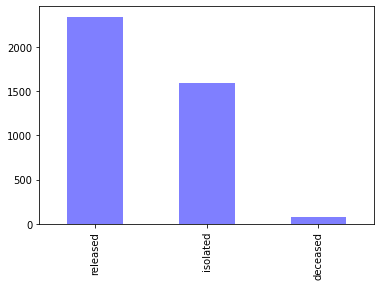

In [ ]:
# 환자의 현재 상태를 집계하고 시각화
state_counts = df1.state.value_counts()
state_counts = state_counts.sort_values(ascending=False)
state_counts.plot.bar(color='blue', alpha=0.5)
plt.show()

#### 데이터 두개 함께 분석


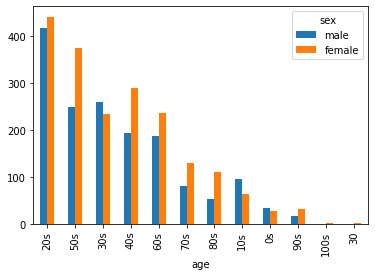

In [ ]:
# 연령대와 성별을 조합해서 집계하고 시각화 해본다.
ct = pd.crosstab(df1.age, df1.sex)  #pd.crosstab 데이터 재구조화(pandas)
ct['total'] = ct.male + ct.female
ct.sort_values(by='total', ascending=False)[['male', 'female']].plot.bar()
plt.show()

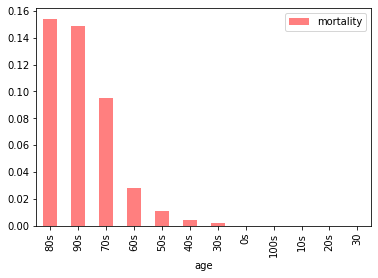

In [ ]:
# age(연령대)별 사망비율
ct = pd.crosstab(df1.age, df1.state=='deceased')  # deceased = 사망
ct.columns = ['alive','deceased']
ct['mortality'] = ct.deceased/(ct.alive + ct.deceased)  # mortality = 사망비율
ct.sort_values(by=['mortality'], ascending=False)[['mortality']].plot.bar(color='red', alpha=0.5)   # mortality로 소팅 및 시각화.
plt.show()

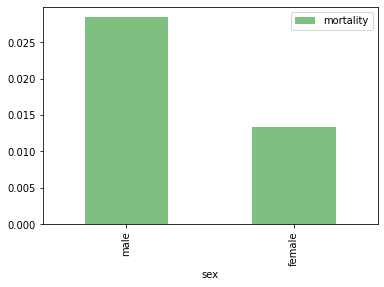

In [ ]:
# sex(성별)사망률
ct = pd.crosstab(df1.sex, df1.state=='deceased')
ct.columns = ['alive','deceased']
ct['mortality'] = ct.deceased/(ct.alive + ct.deceased)
ct.sort_values(by=['mortality'], ascending=False)[['mortality']].plot.bar(color='green', alpha=0.5)   # mortality로 소팅 및 시각화.
plt.show()

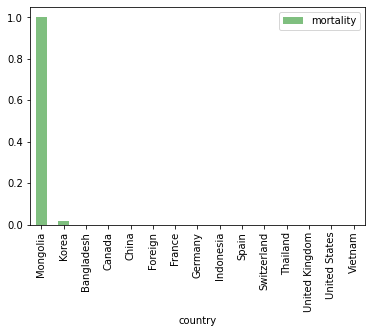

In [ ]:
ct = pd.crosstab(df1.country, df1.state=='deceased')
ct.columns = ['alive','deceased']
ct['mortality'] = ct.deceased/(ct.alive + ct.deceased)
ct.sort_values(by=['mortality'], ascending=False)[['mortality']].plot.bar(color='green', alpha=0.5)   # mortality로 소팅 및 시각화.
plt.show()

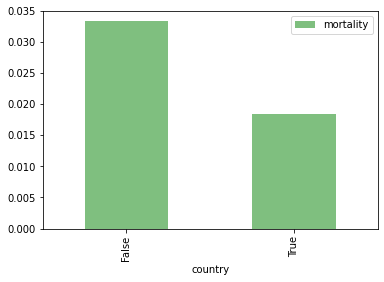

In [ ]:
ct = pd.crosstab(df1.country=='Korea', df1.state=='deceased')
ct.columns = ['alive','deceased']
ct['mortality'] = ct.deceased/(ct.alive + ct.deceased)
ct.sort_values(by=['mortality'], ascending=False)[['mortality']].plot.bar(color='green', alpha=0.5)   # mortality로 소팅 및 시각화.
plt.show()

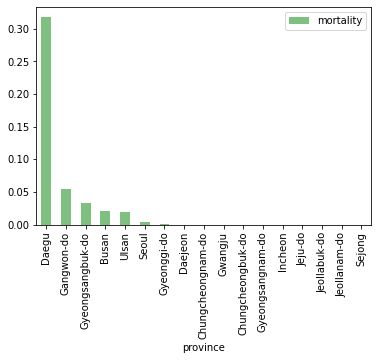

In [ ]:
ct = pd.crosstab(df1.province, df1.state=='deceased')
ct.columns = ['alive','deceased']
ct['mortality'] = ct.deceased/(ct.alive + ct.deceased)
ct.sort_values(by=['mortality'], ascending=False)[['mortality']].plot.bar(color='green', alpha=0.5)   # mortality로 소팅 및 시각화.
plt.show()

#### 감염경로

In [ ]:
# 감염경로 유형의 가짓수 출력
print(df1.infection_case.nunique())

29


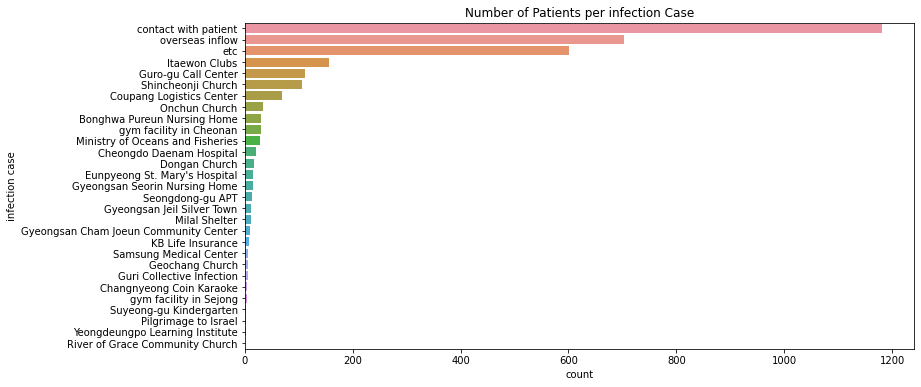

In [ ]:
# 감염 경로별 환자수 집계 후 시각화
res = df1.groupby('infection_case').patient_id.count()    #result를 res
res = res.reset_index()
res.columns = ['infection case', 'count']
res.rename(columns={"infection_case":"infection case","patient_id":"count"},inplace=True)
res = res.sort_values(by='count',ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=res, x='count',y='infection case')   # x와 y를 바꾸면 그래프가 세로로 바뀌어서 생긴다.
plt.title('Number of Patients per infection Case')
plt.show()

#### 다음과 같이 유형의 label을 바꾸어서 다시 집계 및 시각화 해본다.
- 'contact with patient' => 'Individual'     개인접촉
- 'etc'  or NaN         => 'Unknown'         모름
- 'overseas inflow'     => 'Overseas'        해외
-  나머지               => 'Group'            집단


In [ ]:
my_dict = {'contact with patient':'individual','etc':'Unknown','overseas inflow':'Ovseas','나머지':'Group'}

In [ ]:
# 1 헬퍼함수 정의
def my_conversion_func(x):
  if not pd.isnull(x):
    if x in my_dict.keys():
      return my_dict[x]
    else:
      return 'Group'
  else:
    return 'Unknown'

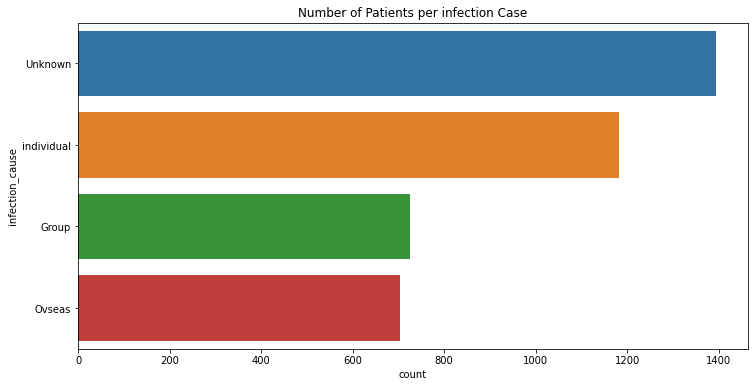

In [ ]:
# 함수를 설정하는 방법1(헬퍼함수정의)과, 람다를 이용하는 방법2
# res = df1.infection_case.apply(my_conversion_func)
res = df1.infection_case.apply(lambda x: my_dict[x] if x in my_dict.keys() else 'Group' if not pd.isnull(x) else 'Unknown')
df1['infection_cause'] = res

# 다시 집계하여 시각화 한다.
res = res.value_counts().sort_values(ascending=False)
res = res.reset_index()
res.rename(columns={'index':'infection_cause','infection_case':'count'},inplace=True) # columns이름이 잘못 되어있으므로 고쳐준다.
res

plt.figure(figsize=(12,6))
sns.barplot(data=res, x='count',y='infection_cause')   # x와 y를 바꾸면 그래프가 세로로 바뀌어서 생긴다.
plt.title('Number of Patients per infection Case')
plt.show()

### 4. 유동성 (Mobility Level)

In [ ]:
# 새롭게 유입경로 데이터를 불러온다.
df2 = pd.read_csv('/content/PatientRoute.csv')
df2.head()

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.6152,126.7156
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.5672,127.0057
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.5926,127.0170
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.5918,127.0168
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.5640,127.0295


In [ ]:
# 결측치의 총 카운트.
df2.isnull().sum().sum()

3264

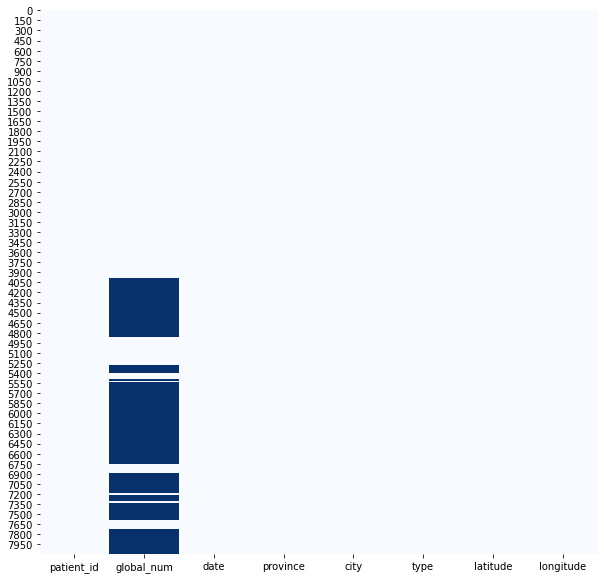

In [ ]:
# 결측치를 시각화 해본다.
plt.figure(figsize = (10,10))                                       # figsize=(가로, 세로) 크기.
sns.heatmap(df2.isnull(), cmap='Blues', cbar=False)
plt.show()

In [ ]:
# 중복된 환자 ID가 많아 보인다.
print("데이터 행의 수 = {}".format(df2.shape[0]))
print("고유한 환자 ID 수 = {}".format(df2.patient_id.nunique()))

데이터 행의 수 = 8092
고유한 환자 ID 수 = 1472


In [ ]:
# 이동 경로의 유형 출력.
print(format(df2.type.unique()))
# 이동 경로의 가지수 출력.
print(format(df2.type.nunique()))

['airport' 'hospital' 'etc' 'store' 'public_transportation' 'restaurant'
 'church' 'beauty_salon' 'pharmacy' 'pc_cafe' 'bank' 'academy' 'cafe'
 'bakery' 'bar' 'gym' 'school' 'real_estate_agency' 'karaoke'
 'post_office' 'gas_station' 'park' 'lodging' 'university'
 'administrative_area_level_1']
25


In [ ]:
# 이동 경로의 유형을 카테고리로 표현해 본다.
leisure = ['library', 'theater', 'cafe', 'bakery', 'beauty_salon',
          'pc_cafe', 'billiards','restaurant', 'bar', 'karaoke']
travel = ['airport', 'lodging']
essential_edu = ['primary_school', 'school', 'university']
non_essential_edu = ['academy']
exercise = ['gym', 'mountain', 'park']
essential_admin = ['administrative_area_level_1', 'governmnet_office', 'post_office']
non_essential_admin = ['police_office', 'bank', 'real_estate_agency']
necessity = ['store', 'public_transportation', 'gas_station']
medical = ['hospital', 'pharmacy']
church = ['church']
etc = ['etc']

In [ ]:
# "필수적" 카테고리는 다음과 같이 정의한다.
essential = essential_edu + essential_admin + necessity + medical 
len(essential)

11

In [ ]:
# 필수/부수적 여부 변수 'is_essential' 파생변수로 추가.
def isessential(x):     
    if x in essential: 
        res = True
    else:
        res = False 
    return res
df2['is_essential'] = df2['type'].apply(lambda x: isessential(x)) 

# 데이터 프레임 간추리기.
df2 = df2[['patient_id', 'type', 'is_essential']]
df2.head()

,patient_id,type,is_essential
0,1000000001,airport,False
1,1000000001,hospital,True
2,1000000002,etc,False
3,1000000002,store,True
4,1000000002,public_transportation,True


In [ ]:
# 동일 환자의 경로 유형을 집계한다 (sum).
# 결측치는 0으로 채운다. fill_value
df2['route_value'] = 1       # 1로 채워진 컬럼을 추가해서 집계의 목적으로 사용한다.
df3 = pd.pivot_table(data=df2, index = 'patient_id', columns = 'is_essential', values= 'route_value', aggfunc='sum', fill_value=0)  #aggfunc 데이터 집계함수
df3.head()

is_essential,False,True
patient_id,,
1000000001,1,1
1000000002,4,9
1000000003,2,0
1000000004,0,1
1000000005,0,1


In [ ]:
################# 참고
# 집계해주는 함수
pd.pivot_table(data=df2, index="is_essential",values='route_value', aggfunc='sum',fill_value=0)

# ==
print(df2.is_essential.value_counts())

True     4205
False    3887
Name: is_essential, dtype: int64


In [ ]:
# Index로 있는 patient_id를 컬럼으로 빼내고 정리한다.
df3.columns.name=None
df3 = df3.reset_index()
df3 = df3.rename(columns={False:'non_essential',True:'essential'})
df3.head()

,patient_id,non_essential,essential
0,1000000001,1,1
1,1000000002,4,9
2,1000000003,2,0
3,1000000004,0,1
4,1000000005,0,1


In [ ]:
# df1 (PatientInfo)와 df3 (PatientRoute 요약)을 Inner Join 해서 가로 방향으로 붙여서 df_joined를 만든다.
df_joined = df1.merge(df3, left_on = 'patient_id', right_on = 'patient_id' , how='inner')

# 살펴본다.
df_joined.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,infection_cause,non_essential,essential
0,1000000001,2.0,male,1964,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released,Ovseas,1,1
1,1000000002,5.0,male,1987,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released,Ovseas,4,9
2,1000000003,6.0,male,1964,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released,individual,2,0
3,1000000004,7.0,male,1991,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released,Ovseas,0,1
4,1000000005,9.0,female,1992,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released,individual,0,1


In [ ]:
# 모든 환자에 대해서 동선이 명확한 것이 아니기 때문에 Join 후 대폭 행의 수가 줄어 들었다.
print("Number of Rows Before = {}".format(len(df1)))
print("Number of Rows After = {}".format(len(df_joined)))

Number of Rows Before = 4004
Number of Rows After = 1472


### 5. 접촉 빈도 (Number of Contacts)

In [ ]:
# contact_number가 결측치가 아니고 '-'가 아닌 행들만 가져온다. '-'는 오류로 유입된 값인듯.
res = df_joined.contact_number
df_joined = df_joined[~res.isnull() & (res != '-')]

In [ ]:
# contact_number의 자료형을 integer로 변경하고 이상값은 제거한다.
df_joined['contact_number'] = df_joined.contact_number.astype(int)
df_joined = df_joined[df_joined.contact_number < 10000]

In [ ]:
# 최대 첩촉빈도.
df_joined.contact_number.max()

1160

In [ ]:
# 최대 첩촉빈도에 해당하는 환자.
df_joined[df_joined.contact_number == df_joined.contact_number.max()]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state,infection_cause,non_essential,essential
901,1200000031,31.0,female,1959,60s,Korea,Daegu,NaN,NaN,Shincheonji Church,NaN,NaN,1160,NaN,2020-02-18,NaN,NaN,isolated,Group,5,11


In [ ]:
# 필요한 컬럼만 가져와서 정리한다.
df4 = df_joined[['patient_id', 'contact_number', 'essential','non_essential','infection_cause']]
df4.head()

,patient_id,contact_number,essential,non_essential,infection_cause
0,1000000001,75,1,1,Ovseas
1,1000000002,31,9,4,Ovseas
2,1000000003,17,0,2,individual
3,1000000004,9,1,0,Ovseas
4,1000000005,2,1,0,individual


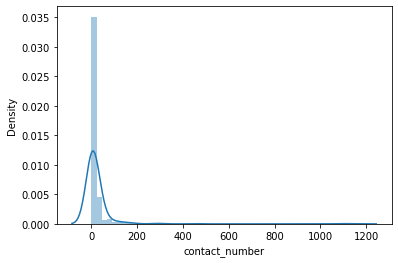

In [ ]:
# 접촉 빈도를 히스토그램으로 시각화 한다.
sns.distplot(df4.contact_number,bins=50)
plt.show()

### 6. 군집화 (Clustering)

In [ ]:
# 원핫인코딩 pd.get_dummies
# drop_first=True라고 하면 첫번째 칼럼이 드랍된다.
# Infection_cause를 가변수 처리한다.
df4 = df4.join(pd.get_dummies(df4.infection_cause, prefix='infection',drop_first=False))
# prefix는 공통된 시작단어 반환
df4

,patient_id,contact_number,essential,non_essential,infection_cause,infection_Group,infection_Ovseas,infection_Unknown,infection_individual
0,1000000001,75,1,1,Ovseas,0,1,0,0
1,1000000002,31,9,4,Ovseas,0,1,0,0
2,1000000003,17,0,2,individual,0,0,0,1
3,1000000004,9,1,0,Ovseas,0,1,0,0
4,1000000005,2,1,0,individual,0,0,0,1
...,...,...,...,...,...,...,...,...,...
1242,6001000045,4,4,0,Unknown,0,0,1,0
1244,6001000061,2,1,3,Unknown,0,0,1,0
1246,6001000063,1,1,0,Unknown,0,0,1,0
1317,6014000001,11,1,4,Unknown,0,0,1,0


In [ ]:
df_final = df4[ ['essential', 'non_essential', 'contact_number',
          'infection_Group', 'infection_individual', 'infection_Ovseas', 'infection_Unknown']]

df_final

,essential,non_essential,contact_number,infection_Group,infection_individual,infection_Ovseas,infection_Unknown
0,1,1,75,0,0,1,0
1,9,4,31,0,0,1,0
2,0,2,17,0,1,0,0
3,1,0,9,0,0,1,0
4,1,0,2,0,1,0,0
...,...,...,...,...,...,...,...
1242,4,0,4,0,0,0,1
1244,1,3,2,0,0,0,1
1246,1,0,1,0,0,0,1
1317,1,4,11,0,0,0,1


In [ ]:
# 군집의 수 = 4로 정하고 군집화를 실행한다.  <= 군집의 수 최적화가 선행되어야 한다! (부록 참고)
my_km = KMeans(n_clusters = 4, random_state = 123)
my_km.fit(X)

my_centroids = my_km.cluster_centers_               # 개개 군집의 중심점.
my_cluster_labels = my_km.labels_                   # 군집 label.

In [ ]:
# 컬럼의 표준화를 실행한다.
X = df_final.values                        
my_scaler = StandardScaler()   # 데이터를 정규분포로 표준화
X = my_scaler.fit_transform(X)  # 데이터를 훈련시킨다.

In [ ]:
pd.DataFrame(data=X, columns= df_final.columns)

,essential,non_essential,contact_number,infection_Group,infection_individual,infection_Ovseas,infection_Unknown
0,-0.7539,-0.5163,0.5649,-0.5458,-0.7916,2.0747,-0.4949
1,2.2050,0.0920,0.0826,-0.5458,-0.7916,2.0747,-0.4949
2,-1.1237,-0.3135,-0.0709,-0.5458,1.2632,-0.4820,-0.4949
3,-0.7539,-0.7190,-0.1585,-0.5458,-0.7916,2.0747,-0.4949
4,-0.7539,-0.7190,-0.2353,-0.5458,1.2632,-0.4820,-0.4949
...,...,...,...,...,...,...,...
361,0.3557,-0.7190,-0.2134,-0.5458,-0.7916,-0.4820,2.0207
362,-0.7539,-0.1108,-0.2353,-0.5458,-0.7916,-0.4820,2.0207
363,-0.7539,-0.7190,-0.2462,-0.5458,-0.7916,-0.4820,2.0207
364,-0.7539,0.0920,-0.1366,-0.5458,-0.7916,-0.4820,2.0207


**해석:** <br>
- Label 0 (red): Social minimalists.
- Label 1 (blue): Hyper-mobile and hyper-social.
- Label 2 (green): Overseas non-essentialists. 
- Label 3 (yellow): Moderate unknwons.